In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/mahathangam/indian-kids-screentime-analysis/Indian_Kids_Screen_Time.csv


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")



In [72]:
df = pd.read_csv('/kaggle/input/datasets/mahathangam/indian-kids-screentime-analysis/Indian_Kids_Screen_Time.csv')

In [73]:
# Check missing values before handling
df.isnull().sum()


Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [74]:
df['Health_Impacts'] = df['Health_Impacts'].fillna("No Health Impact")


In [75]:
df.isnull().sum()


Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
dtype: int64

In [76]:
df['Health_Impacts'].value_counts()


Health_Impacts
No Health Impact                                 3218
Poor Sleep                                       2268
Poor Sleep, Eye Strain                            979
Eye Strain                                        644
Poor Sleep, Anxiety                               608
Poor Sleep, Obesity Risk                          452
Anxiety                                           385
Poor Sleep, Eye Strain, Anxiety                   258
Obesity Risk                                      252
Poor Sleep, Eye Strain, Obesity Risk              188
Eye Strain, Anxiety                               135
Eye Strain, Obesity Risk                          106
Poor Sleep, Anxiety, Obesity Risk                  78
Anxiety, Obesity Risk                              69
Poor Sleep, Eye Strain, Anxiety, Obesity Risk      37
Eye Strain, Anxiety, Obesity Risk                  35
Name: count, dtype: int64

### Handling Missing Values

Missing values were identified in the *Health_Impacts* column.

Statistical imputation methods such as mean, median, or mode were not applied,
as the column represents categorical health-related outcomes.

Instead, missing values were replaced with **"No Health Impact"**.

**Justification:**
- Missing values indicate no explicitly reported health issues.
- Statistical methods are inappropriate for categorical data.
- This approach preserves semantic meaning and avoids bias.

Validation confirmed that no missing values remain in the dataset.


In [77]:
df.head()


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,No Health Impact,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


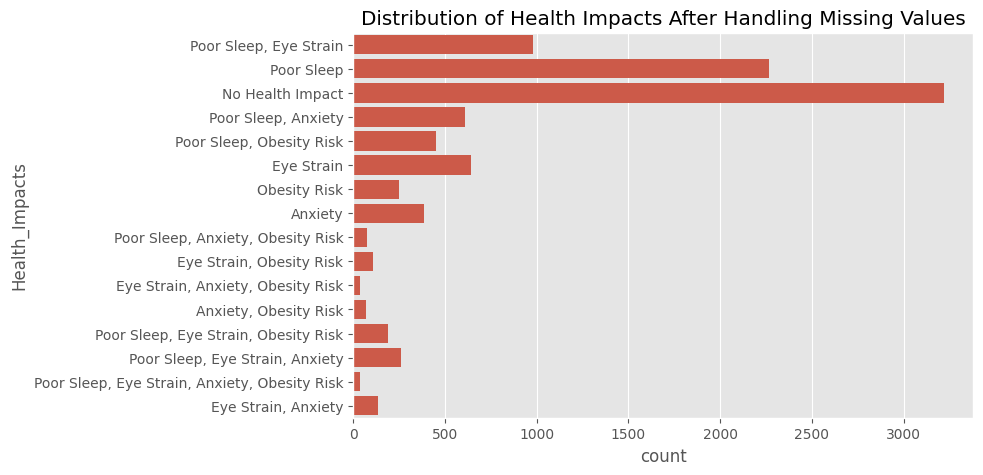

In [78]:
plt.figure(figsize=(8,5))
sns.countplot(y='Health_Impacts', data=df)
plt.title("Distribution of Health Impacts After Handling Missing Values")
plt.show()


### Update Summary

Handled missing values without statistical imputation and added justification.


In [79]:
df.shape


(9712, 8)

In [80]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     9712 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [81]:
df.describe()


,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


In [82]:
df.isnull().sum()


Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
dtype: int64

In [83]:
df.columns


Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural'],
      dtype='object')

In [84]:
df.head()


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,No Health Impact,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [85]:
df['Exceeded_Recommended_Limit'].value_counts()


Exceeded_Recommended_Limit
True     8301
False    1411
Name: count, dtype: int64

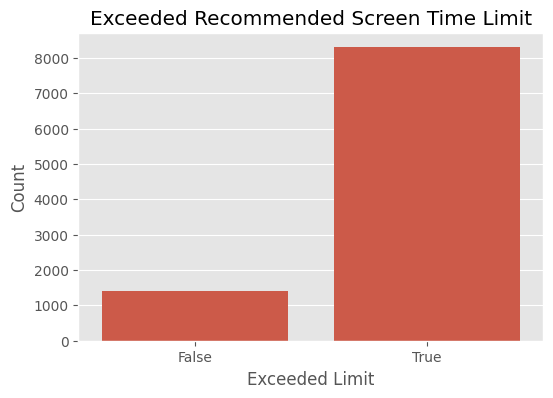

In [86]:
plt.figure(figsize=(6,4))
sns.countplot(x='Exceeded_Recommended_Limit', data=df)
plt.title("Exceeded Recommended Screen Time Limit")
plt.xlabel("Exceeded Limit")
plt.ylabel("Count")
plt.show()


In [87]:
df['Health_Impacts'].value_counts()


Health_Impacts
No Health Impact                                 3218
Poor Sleep                                       2268
Poor Sleep, Eye Strain                            979
Eye Strain                                        644
Poor Sleep, Anxiety                               608
Poor Sleep, Obesity Risk                          452
Anxiety                                           385
Poor Sleep, Eye Strain, Anxiety                   258
Obesity Risk                                      252
Poor Sleep, Eye Strain, Obesity Risk              188
Eye Strain, Anxiety                               135
Eye Strain, Obesity Risk                          106
Poor Sleep, Anxiety, Obesity Risk                  78
Anxiety, Obesity Risk                              69
Poor Sleep, Eye Strain, Anxiety, Obesity Risk      37
Eye Strain, Anxiety, Obesity Risk                  35
Name: count, dtype: int64

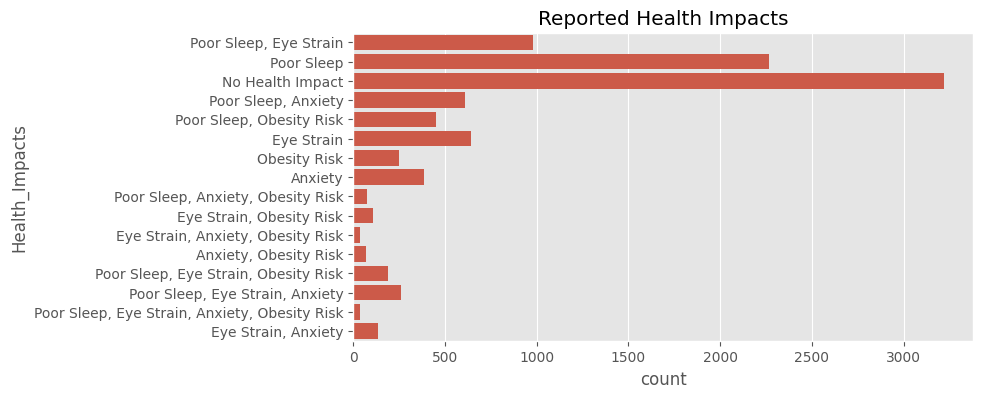

In [88]:
plt.figure(figsize=(8,4))
sns.countplot(y='Health_Impacts', data=df)
plt.title("Reported Health Impacts")
plt.show()


### Health Impacts Analysis

- The `Health_Impacts` feature contains multiple combined categories
- Poor Sleep is the most frequently reported health issue
- Eye Strain and Anxiety often co-occur with Poor Sleep
- Multiple health impacts are observed for many children, indicating cumulative effects of screen time


In [89]:
health_series = df['Health_Impacts'].str.split(', ')
health_exploded = health_series.explode()

health_exploded.value_counts()


Health_Impacts
Poor Sleep          4868
No Health Impact    3218
Eye Strain          2382
Anxiety             1605
Obesity Risk        1217
Name: count, dtype: int64

In [90]:
health_exploded = (
    df['Health_Impacts']
    .dropna()
    .str.split(', ')
    .explode()
)


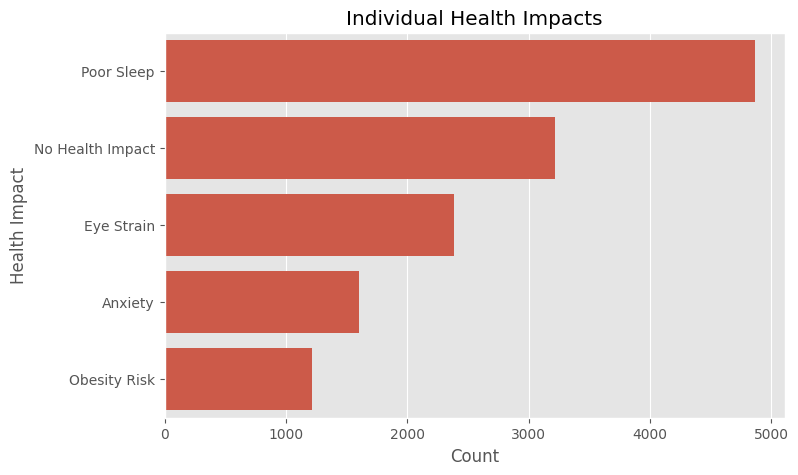

In [91]:
plt.figure(figsize=(8,5))
sns.countplot(
    y=health_exploded,
    order=health_exploded.value_counts().index
)
plt.title("Individual Health Impacts")
plt.xlabel("Count")
plt.ylabel("Health Impact")
plt.show()


### Individual Health Impact Analysis

- The Health_Impacts column contains multiple comma-separated values
- After splitting, Poor Sleep is the most frequent health issue
- Eye Strain and Anxiety are also commonly observed
- This indicates cumulative health effects due to excessive screen exposure

Handling Missing (Null) Values

In this dataset, missing values are not treated using statistical imputation 
(mean, median, or mode).

 Reason:
 This dataset relates to children's screen time and health impacts.
 Missing values may indicate no reported issue rather than numerical absence.
 Using mean/median could introduce false health interpretations.
 Therefore, null values are preserved or labeled as No Health Impact .
